<a href="https://colab.research.google.com/github/raphaelobinna/Fractal-Tree/blob/main/Michael_levin_gen_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In Group: ['*acc', 'aba*']
Out Group: ['nbbppanb', 'p*b']


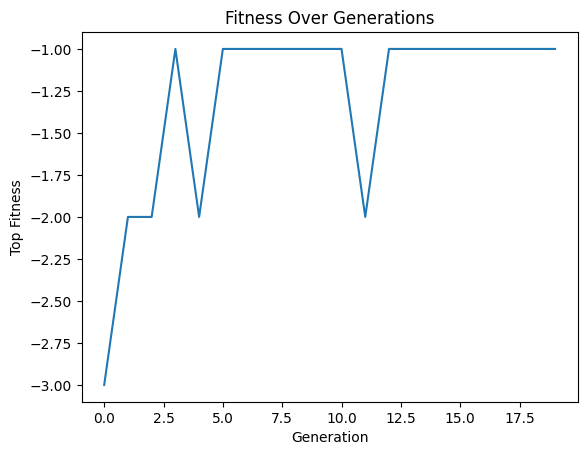

['an',
 'n',
 '*',
 'nba',
 'naaa',
 'aphhhn',
 'hbphph*',
 'cabbhbb',
 'apnnanbcbn',
 'bh*bcncc*',
 'hnh']

In [22]:
# Trying to mplement Michael Levin's Locating Putative Protein Signal Sequences of 1995

import random
import numpy as np
import matplotlib.pyplot as plt

# Amino acids and their types
amino_acids = {
    '*': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'],
    'a': ['D', 'E'],
    'b': ['K', 'R', 'H'],
    'n': ['A', 'G', 'V', 'L', 'I', 'P'],
    'h': ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'],
    'p': ['S', 'T', 'Y', 'N', 'Q'],
    'c': ['D', 'E', 'K', 'R', 'H']
}

# Fitness function parameters
k1 =15
k2 =2
k3 = 3
k4 = 0.1

# Generate initial population
def generate_initial_population(size, min_length=3, max_length=10):
    population = []
    for _ in range(size):
        length = random.randint(min_length, max_length)
        sequence = ''.join(random.choice(''.join(amino_acids.keys())) for _ in range(length))
        population.append(sequence)
    return population


def compute_fitness(sequence, in_proteins, out_proteins):
    match_ins = 0
    for protein in in_proteins:
        if sequence in protein:
            match_ins + 1



    match_outs = 0
    for protein_out in out_proteins:
        if sequence in protein_out:
            match_outs + 1


    match_ins = match_ins/len(in_proteins)
    match_outs = match_outs/len(out_proteins)

    knowledge = match_ins - (k4* match_outs)
    size = len(sequence)
    vagueness = sum([1 for char in sequence if char in amino_acids.keys()])

    return (k1*knowledge) + (k2*size) - (k3*vagueness)



# Cross-over
def crossover(parent1, parent2):
    point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation
def mutate(sequence):
    mutation_type = random.choice(['insert', 'delete', 'substitute'])
    pos = random.randint(0, len(sequence) - 1)
    if mutation_type == 'insert':
        sequence = sequence[:pos] + random.choice(''.join(amino_acids.keys())) + sequence[pos:]
    elif mutation_type == 'delete' and len(sequence) > 1:
        sequence = sequence[:pos] + sequence[pos+1:]
    elif mutation_type == 'substitute':
        sequence = sequence[:pos] + random.choice(''.join(amino_acids.keys())) + sequence[pos+1:]
    return sequence

def general(generations):
    proteins = []

    for _ in range(5):
        pop = generate_initial_population(10)
        proteins.append(pop)

    in_group= []
    for _ in range(random.randint(1, 6)):
        prot = proteins[random.randint(0, 4)][random.randint(0, 9)]
        in_group.append(prot)

    out_group= []
    for _ in range(random.randint(1, 6)):
        prot = proteins[random.randint(0, 4)][random.randint(0, 9)]
        out_group.append(prot)


    print(f'In Group: {in_group}')
    print(f'Out Group: {out_group}')

    fitness_history = []

    population = generate_initial_population(10)

    for _ in range(generations):

        fitness = [compute_fitness(seq, in_group, out_group) for seq in population]
        fitness_history.append(max(fitness))

        # Sort by fitness
        population = [x for _, x in sorted(zip(fitness, population), reverse=True)]

        # Selection and Crossover
        new_population = population[:len(population)//2]

        while len(new_population) < len(population):
            parent1, parent2 = random.sample(generate_initial_population(10), 2)

            child1, child2 = crossover(parent1, parent2)
            new_population.extend([child1, child2])

        # Mutation

        population = [mutate(seq) for seq in new_population]

    # Plot fitness
    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Top Fitness')
    plt.title('Fitness Over Generations')
    plt.show()

    return population


general(20)
